In [1]:
# Non-pooled t-tests 
# Inference for two population means
# independent samples
# population standard deviations assumed NOT equal

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats

In [4]:
# testing mean operating times of dymaic vs static systems

# Hypotheses:
# Ho: u1 >= u2
# Ha: u1 < u2 (mean operative time is less with the dynamic system) 

# define alpha
alpha = 0.05
print(f'alpha: {alpha}')

# Define the two datasets as arrays
dynamic_sample = np.array([370, 360, 510, 445, 295, 315, 490, 345, 450, 505, 335, 280, 325, 500])
static_sample = np.array([430, 445, 455, 455, 490, 535])

# sample sizes
n1 = len(dynamic_sample)
n2 = len(static_sample)
print(f'dynamic n={n1}')
print(f'static n={n2}')

mean1 = np.mean(dynamic_sample)
mean2 = np.mean(static_sample)
print(f'x1: {mean1}')
print(f'x2: {mean2}')

std1 = np.std(dynamic_sample, ddof=1)
std2 = np.std(static_sample, ddof=1)
print(f'std1: {std1}')
print(f'std2: {std2}')

alpha: 0.05
dynamic n=14
static n=6
x1: 394.64285714285717
x2: 468.3333333333333
std1: 84.74995542804105
std2: 38.16630276391292


test for normality: ShapiroResult(statistic=0.8850255608558655, pvalue=0.06856437772512436)
do not reject the null


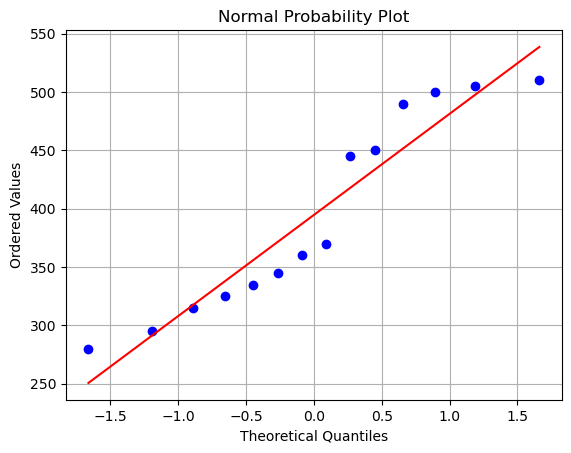

In [5]:
## test for normality on sample 1

# test for normality
# Ho: data is normally distributued
# Ha: data is not normally distributed

shapiro_test = stats.shapiro(dynamic_sample)
print(f'test for normality: {shapiro_test}')

if (round(shapiro_test[1],2)) < alpha:
    print("reject the null hypotheses")
else:
    print("do not reject the null")

fix, ax = plt.subplots()
stats.probplot(dynamic_sample, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

test for normality: ShapiroResult(statistic=0.8818855285644531, pvalue=0.27782824635505676)
do not reject the null


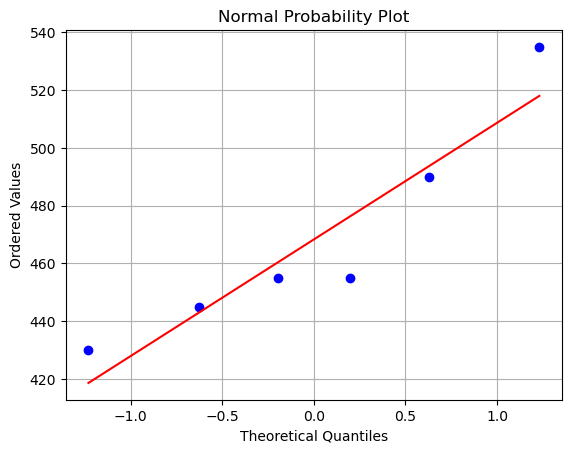

In [6]:
## test for normality on sample 2

# test for normality
# Ho: data is normally distributued
# Ha: data is not normally distributed

shapiro_test = stats.shapiro(static_sample)
print(f'test for normality: {shapiro_test}')

if (round(shapiro_test[1],2)) < alpha:
    print("reject the null hypotheses")
else:
    print("do not reject the null")

fix, ax = plt.subplots()
stats.probplot(static_sample, dist="norm", plot=ax)
plt.title("Normal Probability Plot")
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

In [21]:
# Calculate the test statistic (t-test for non-pooled independent samples )
t_statistic = (mean1 - mean2) / np.sqrt((std1**2/n1) + (std2**2/n2))
t_statistic = round(t_statistic,3)
print(f't-statistic: {t_statistic}')

# Perform Welch's t-test (non-pooled t-test)
t_statistic, p_value = stats.ttest_ind(dynamic_sample, static_sample, equal_var=False)
t_statistic = round(t_statistic,3)
print(f'Welch t-statistic: {t_statistic}')
t_statistic


# Calculate the degrees of freedom for Welch's t-test
def welch_degrees_of_freedom(x1, x2):
    n1 = len(x1)
    n2 = len(x2)
    s1_sq = np.var(x1, ddof=1)
    s2_sq = np.var(x2, ddof=1)
    
    numerator = (s1_sq / n1 + s2_sq / n2) ** 2
    denominator = ((s1_sq / n1) ** 2 / (n1 - 1)) + ((s2_sq / n2) ** 2 / (n2 - 1))
    
    return numerator / denominator

df = welch_degrees_of_freedom(dynamic_sample, static_sample)
df = int(df)
print(f'df={df}')

t-statistic: -2.68
Welch t-statistic: -2.68
df=17


In [23]:
# Critical-Value Approach
print("critical value approach")

# Determine critical t-value for 95% confidence level (two-tailed test)
# t_critical = stats.t.ppf(1 - alpha/2, df)
# t_critical = round(t_critical,3)
# print(f'critical value: {t_critical}')

# Determine critical t-value for 95% confidence level (left-tailed test)
t_critical = stats.t.ppf(alpha, df)
t_critical = round(t_critical,3)
print(f'critical value: {t_critical}')

# Determine critical t-value for 95% confidence level (right-tailed test)
# t_critical = stats.t.ppf(1 - alpha, df)
# t_critical = round(t_critical, 3)
# print(f'critical value (right-tailed): {t_critical}')


# P-Value Approach
print("\np-value approach")

# Perform the t-test for two independent samples
t_statistic, p_value = stats.ttest_ind(dynamic_sample, static_sample, equal_var=False)
p_value = round(p_value,2)
print(f'alpha: {alpha}')
print(f'p-value: {p_value}')

critical value approach
critical value: -1.74

p-value approach
alpha: 0.05
p-value: 0.02


In [36]:
## non-pooled t-interval procedure

## 90% confidence interval
confidence_level = 0.90
alpha = 1 - confidence_level
alpha = round(alpha,2)
print(f'alpha: {alpha}')

# differnece of sample means
mean_diff = mean1 - mean2
mean_diff = round(mean_diff,2)
print(f'x_bar_1 - x_bar_2: {mean_diff}')

# Determine critical t-value (left-tailed test)
t_critical = stats.t.ppf(1 - alpha/2, df)
t_critical = round(t_critical,3)
print(f'critical value: {t_critical}')

# calclate margin of error
margin_of_error = t_critical * np.sqrt((std1**2/n1) + (std2**2/n2))
margin_of_error = round(margin_of_error,2)
print(f'ME: {margin_of_error}')

# Confidence interval calculation
ci_lower = mean_diff - margin_of_error
ci_lower = round(ci_lower,2)

ci_upper = mean_diff + margin_of_error
ci_upper = round(ci_upper,2)

print(f't-interval: {ci_lower, ci_upper}')

alpha: 0.1
x_bar_1 - x_bar_2: -73.69
critical value: 1.74
ME: 47.84
t-interval: (-121.53, -25.85)
